# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install gensim

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import CountVectorizer   # Methods for text vectorization # Converts text into a bag-of-words model


# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
true_news = pd.read_csv("True.csv")
# Import the second file - Fake.csv
fake_news = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
true_news.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [6]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news.head()

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [7]:
# Print the column details for True News DataFrame
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Print the column details for Fake News Dataframe
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
# Print the column names of both DataFrames
print(true_news.columns)
print(fake_news.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true_news, fake_news], ignore_index=True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [14]:
# Handle Rows with Null Values
df.dropna(inplace=True)
df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

In [15]:
df.shape

(44898, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   date        44898 non-null  object
 3   news_label  44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [17]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df.drop(columns=['title', 'text', 'date'], inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
df.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [18]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [19]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove all punctuation including commas, apostrophes, double quotes, and special quotes
    text = text.translate(str.maketrans('', '', string.punctuation.replace("\'", "").replace("\,", "")))

    # Remove any special quotes (curly quotes)
    text = re.sub(r'[\“\”\‘\’\"\'\,]', '', text)

    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)

    # Remove extra spaces (if any) after cleaning
    text = re.sub(r'\s+', ' ', text).strip()

    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [20]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df['news_text'].progress_apply(clean_text)

100%|██████████| 44898/44898 [00:20<00:00, 2171.54it/s]


In [21]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [22]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

def pos_tagging_and_lemmatization(text):
    # Disable unnecessary pipeline components (like NER and parsing)
    with nlp.disable_pipes('ner', 'parser'):
        doc = nlp(text)

    lemmatized_nouns = [
        token.lemma_ for token in doc
        if not token.is_stop and token.pos_ == 'NOUN' and token.tag_ in ['NN', 'NNS']
    ]

    return lemmatized_nouns

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [23]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(pos_tagging_and_lemmatization)

100%|██████████| 44898/44898 [13:30<00:00, 55.42it/s]


### Save the Cleaned data as a csv file (Recommended)

In [24]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [25]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [26]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [27]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44889 non-null  object
 2   lemmatized_text  44898 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [28]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Perform the split into train and validation using the full DataFrame (df_clean)
df_train, df_val = train_test_split(df_clean, test_size=0.3, random_state=42)


In [29]:
df_train.head()

news_label  \
13970           1   
41668           0   
26810           0   
30967           0   
26072           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cleaned_text  \
13970                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [30]:
df_val.head()

news_label  \
22216           0   
27917           0   
25007           0   
1377            1   
32476           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         cleaned_text  \
22216                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       breaking gop chairman grassley has had enough demands trump jr testimony donald trump s white house is in chaos and they are trying to cover it up their russia problems are mounting by the hour and they refuse to acknowledge that there are problems surrounding all of this to them it s fake news or a hoax however the facts bear things out differently and it seems that there are now cracks in the congressional public leadershipchuck grassley riowa w

In [31]:
print(df_train.shape)
print(df_val.shape )

(31428, 3)
(13470, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [32]:
# Add a new column to calculate the character length of cleaned news text
df_train.dropna(subset=['cleaned_text'], inplace=True)
df_train.dropna(subset=['lemmatized_text'], inplace=True)
df_train['cleaned_text_length'] = df_train['cleaned_text'].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_train['lemmatized_text_length'] = df_train['lemmatized_text'].apply(len)
df_train.head()

news_label  \
13970           1   
41668           0   
26810           0   
30967           0   
26072           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cleaned_text  \
13970                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

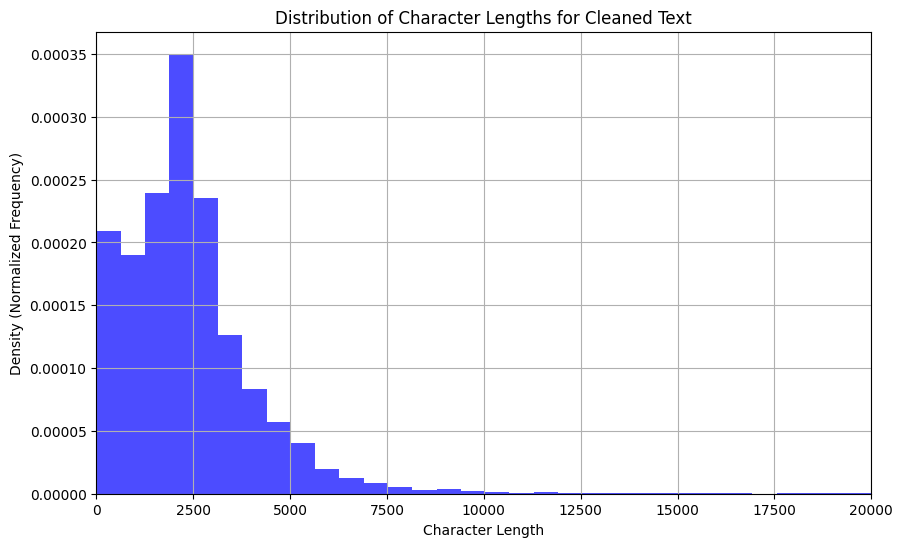

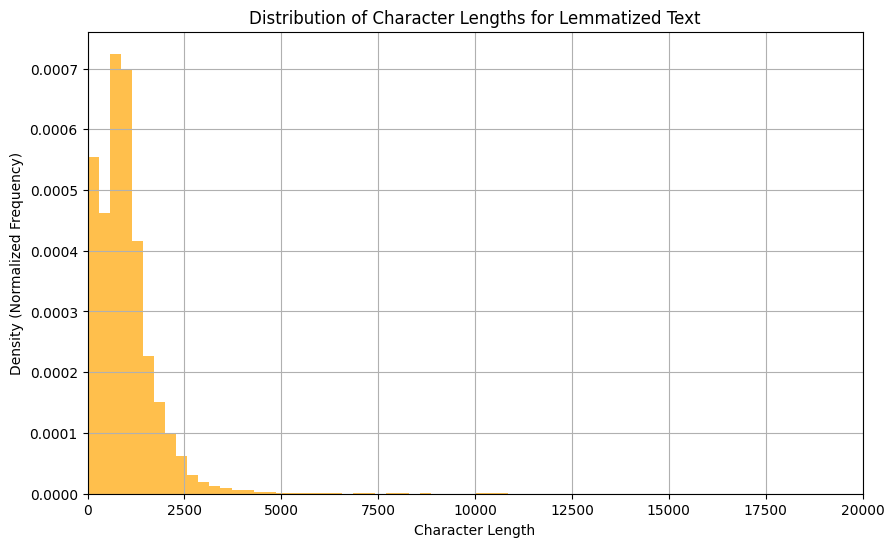

In [33]:
# Create a histogram plot to visualize character lengths
# Plot for cleaned text character lengths
plt.figure(figsize=(10, 6))
plt.hist(df_train['cleaned_text_length'], bins=50, alpha=0.7, color='blue', density=True)
plt.xlabel('Character Length')
plt.ylabel('Density (Normalized Frequency)')
plt.title('Distribution of Character Lengths for Cleaned Text')
plt.xlim(0, 20000)  # Set the x-axis limit to zoom in on relevant character lengths (adjust as necessary)
plt.grid(True)
plt.show()

# Plot for lemmatized text character lengths
plt.figure(figsize=(10, 6))
plt.hist(df_train['lemmatized_text_length'], bins=50, alpha=0.7, color='orange', density=True)
plt.xlabel('Character Length')
plt.ylabel('Density (Normalized Frequency)')
plt.title('Distribution of Character Lengths for Lemmatized Text')
plt.xlim(0, 20000)  # Set the x-axis limit to zoom in on relevant character lengths (adjust as necessary)
plt.grid(True)
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

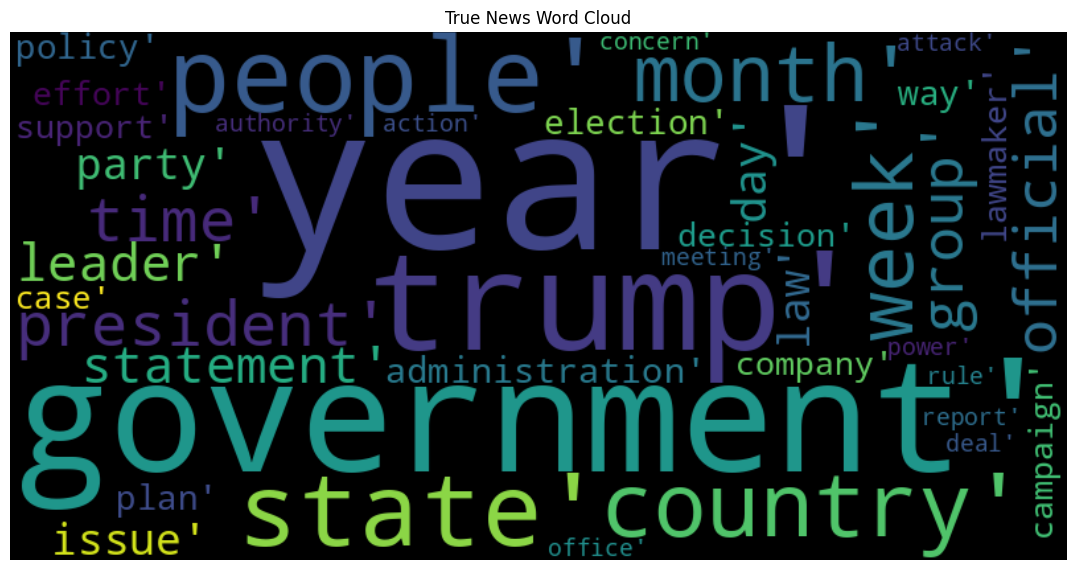

In [34]:
from wordcloud import WordCloud
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = ' '.join(df_train[df_train['news_label'] == 1]['lemmatized_text'])
# Generate word cloud for True News
true_wordcloud = WordCloud(width=800, height=400, max_words=40).generate(true_news_text)
# Display word clouds
plt.figure(figsize=(30, 20))
plt.subplot(1, 2, 1)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('True News Word Cloud')
plt.axis('off')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

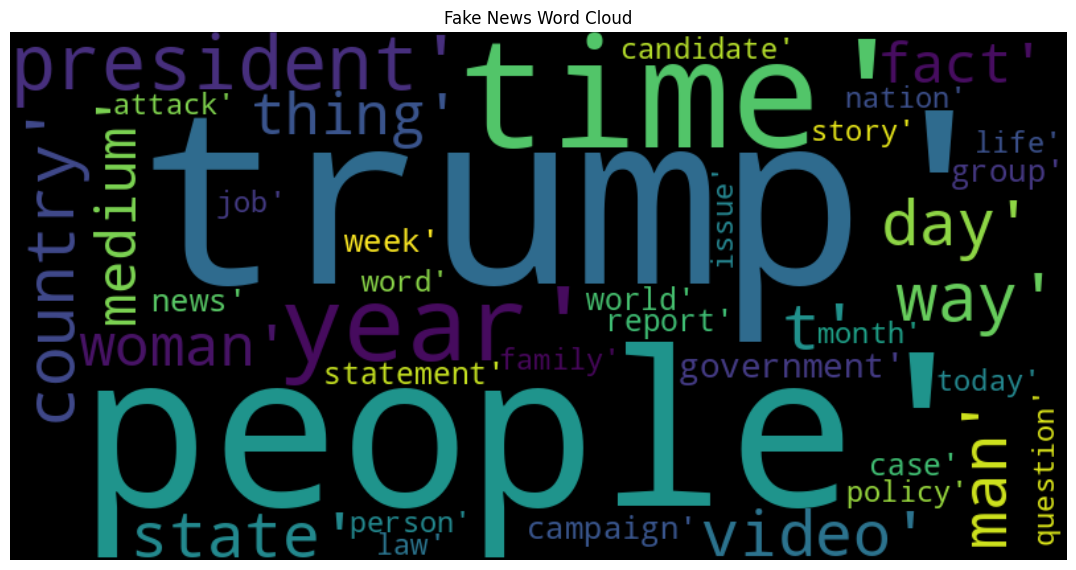

In [35]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = ' '.join(df_train[df_train['news_label'] == 0]['lemmatized_text'])
# Generate word cloud for Fake News
fake_wordcloud = WordCloud(width=800, height=400, max_words=40).generate(fake_news_text)
plt.figure(figsize=(30, 20))
plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [36]:
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Write a function to get the specified top n-grams
def plot_top_ngrams(text_list, n=1, top_n=10):
    # Ensure text_list is a list of strings
    if isinstance(text_list, str):
        # If it's a single string, split into words
        words = text_list.split()
    elif isinstance(text_list, list) and all(isinstance(item, str) for item in text_list):
        # If it's a list of strings, flatten it into a single list of words
        words = [word for sublist in text_list for word in sublist.split()]
    else:
        # If it's a list of lists (e.g., lemmatized output), flatten it
        words = [word for sublist in text_list for word in sublist]

    # Generate n-grams
    ngram_list = list(ngrams(words, n))

    # Count the frequency of n-grams
    ngram_freq = Counter(ngram_list)

    # Get the top n-grams
    top_ngrams = ngram_freq.most_common(top_n)

    # Extract the n-gram labels and frequencies
    ngram_labels = [' '.join(ngram) for ngram, freq in top_ngrams]
    frequencies = [freq for ngram, freq in top_ngrams]

    # Plot the top n-grams
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} {n}-grams')
    plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent n-gram at the top
    plt.show()

    return ngram_labels, frequencies

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [37]:
df_train = df_train.dropna()
df_train.head()

news_label  \
13970           1   
41668           0   
26810           0   
30967           0   
26072           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cleaned_text  \
13970                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


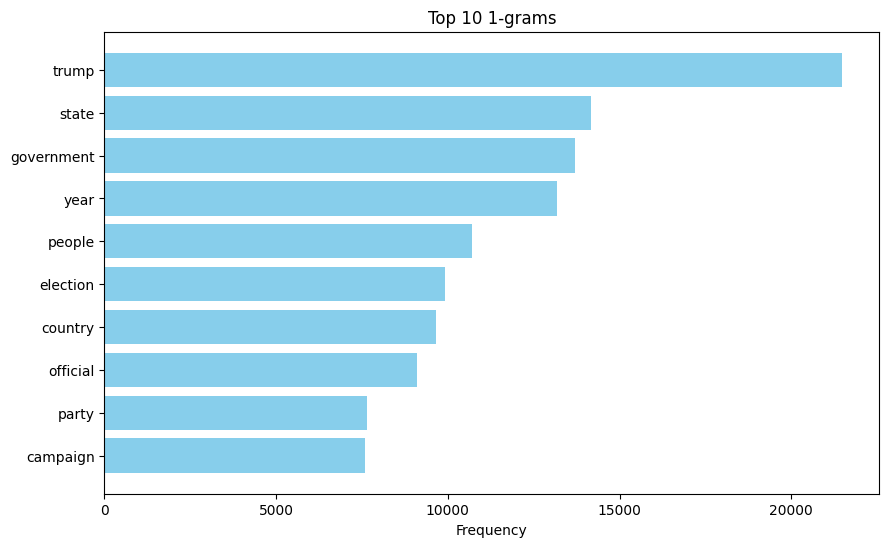

Top 10 Unigrams (True News): [('trump', 21489), ('state', 14174), ('government', 13710), ('year', 13188), ('people', 10716), ('election', 9924), ('country', 9652), ('official', 9102), ('party', 7659), ('campaign', 7591)]


In [38]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
nltk.download('punkt')
nltk.download('punkt_tab')
true_news_lemmatized_list = df_train[df_train['news_label'] == 1]['lemmatized_text'].apply(lambda x: eval(x) if isinstance(x, str) else x).tolist()
ngram_labels, frequencies = plot_top_ngrams(true_news_lemmatized_list, n=1, top_n=10)
print("Top 10 Unigrams (True News):", list(zip(ngram_labels, frequencies)))

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



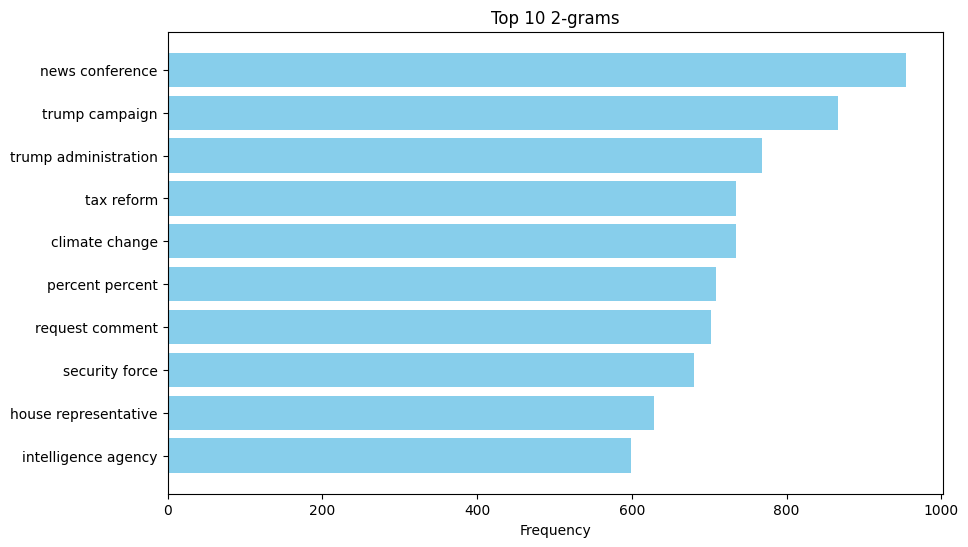

Top 10 Bigrams (True News): [('news conference', 954), ('trump campaign', 866), ('trump administration', 768), ('tax reform', 735), ('climate change', 735), ('percent percent', 709), ('request comment', 703), ('security force', 680), ('house representative', 629), ('intelligence agency', 599)]


In [39]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
ngram_labels, frequencies = plot_top_ngrams(true_news_lemmatized_list, n=2, top_n=10)
print("Top 10 Bigrams (True News):", list(zip(ngram_labels, frequencies)))

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



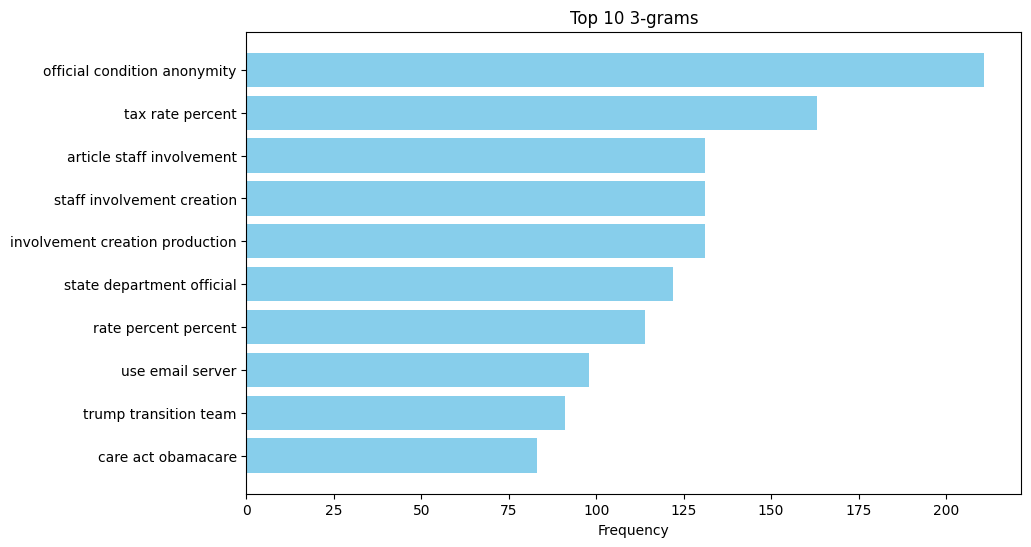

Top 10 trigrams (True News): [('official condition anonymity', 211), ('tax rate percent', 163), ('article staff involvement', 131), ('staff involvement creation', 131), ('involvement creation production', 131), ('state department official', 122), ('rate percent percent', 114), ('use email server', 98), ('trump transition team', 91), ('care act obamacare', 83)]


In [40]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
ngram_labels, frequencies = plot_top_ngrams(true_news_lemmatized_list, n=3, top_n=10)
print("Top 10 trigrams (True News):", list(zip(ngram_labels, frequencies)))

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

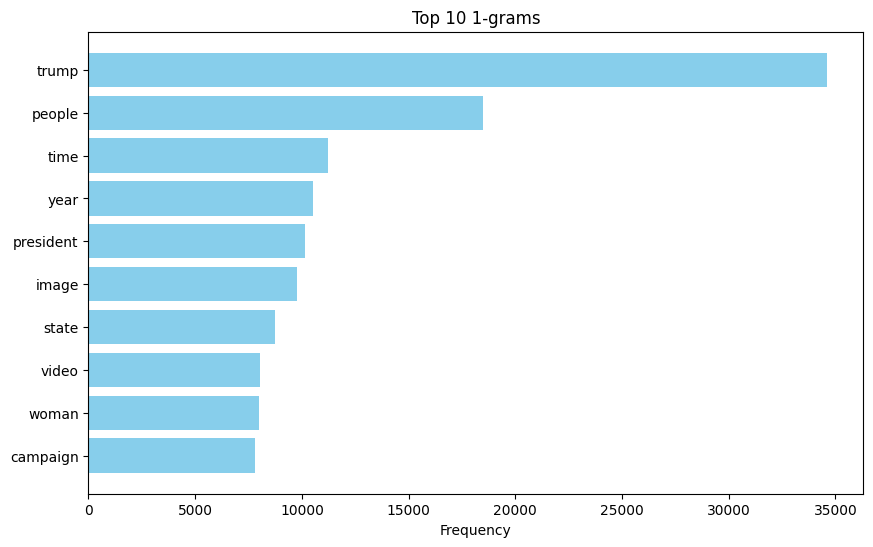

Top 10 Unigrams (Fake News): [('trump', 34584), ('people', 18464), ('time', 11226), ('year', 10533), ('president', 10132), ('image', 9772), ('state', 8751), ('video', 8016), ('woman', 7992), ('campaign', 7786)]


In [41]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news_lemmatized_list = df_train[df_train['news_label'] == 0]['lemmatized_text'].apply(lambda x: eval(x) if isinstance(x, str) else x).tolist()
ngram_labels, frequencies = plot_top_ngrams(fake_news_lemmatized_list, n=1, top_n=10)
print("Top 10 Unigrams (Fake News):", list(zip(ngram_labels, frequencies)))

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



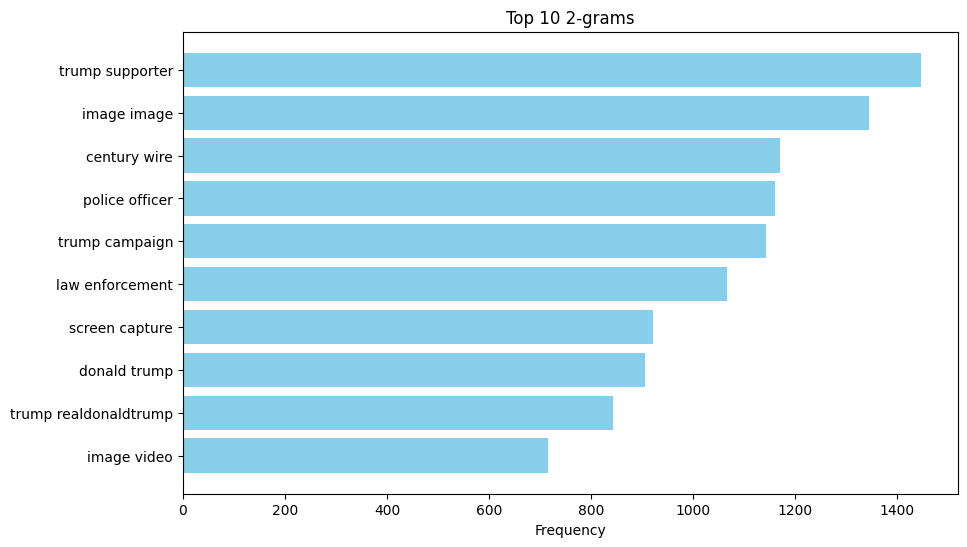

Top 10 Unigrams (Fake News): [('trump supporter', 1446), ('image image', 1345), ('century wire', 1170), ('police officer', 1161), ('trump campaign', 1143), ('law enforcement', 1067), ('screen capture', 922), ('donald trump', 906), ('trump realdonaldtrump', 842), ('image video', 716)]


In [42]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
ngram_labels, frequencies = plot_top_ngrams(fake_news_lemmatized_list, n=2, top_n=10)
print("Top 10 Unigrams (Fake News):", list(zip(ngram_labels, frequencies)))

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



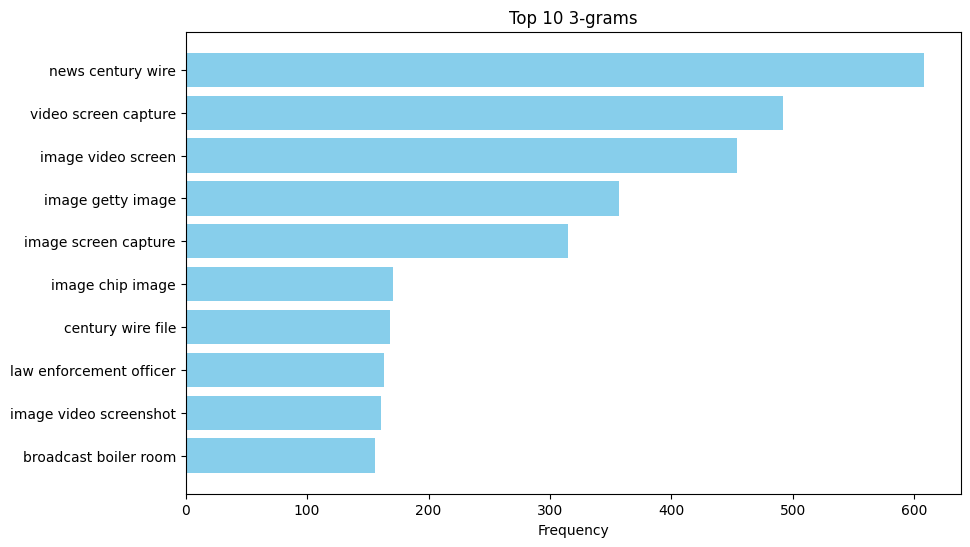

Top 10 Unigrams (Fake News): [('news century wire', 608), ('video screen capture', 492), ('image video screen', 454), ('image getty image', 357), ('image screen capture', 315), ('image chip image', 171), ('century wire file', 168), ('law enforcement officer', 163), ('image video screenshot', 161), ('broadcast boiler room', 156)]


In [43]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
ngram_labels, frequencies = plot_top_ngrams(fake_news_lemmatized_list, n=3, top_n=10)
print("Top 10 Unigrams (Fake News):", list(zip(ngram_labels, frequencies)))

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [44]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [45]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [46]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [47]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [48]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [49]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [50]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [51]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [52]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [53]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [54]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [55]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [56]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [57]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import ast

def document_vector_tfidf(doc, model, tfidf_dict):
    """
    Compute TF-IDF weighted Word2Vec average for a document.
    """
    vec = []
    # Ensure doc is a list of strings, even if it comes in as a single string representation of a list
    if isinstance(doc, str):
        try:
            doc = ast.literal_eval(doc)
        except (ValueError, SyntaxError):
            doc = [] # Handle cases where string is not a valid list representation

    for word in doc:
        if word in model.key_to_index and word in tfidf_dict:
            vec.append(model.get_vector(word) * tfidf_dict[word])
    return np.mean(vec, axis=0) if vec else np.zeros(model.vector_size)

# Remove rows from the training data where lemmatized_text is an empty list or contains only whitespace after joining
# Ensure the column is treated as a list for the filtering condition
df_train_filtered = df_train[
    df_train['lemmatized_text'].apply(
        lambda x: len(' '.join(ast.literal_eval(x)).strip()) > 0 if isinstance(x, str) else len(' '.join(x).strip()) > 0
    )
].copy()

df_val_filtered = df_val[
    df_val['lemmatized_text'].apply(
        lambda x: len(' '.join(ast.literal_eval(x)).strip()) > 0 if isinstance(x, str) else len(' '.join(x).strip()) > 0
    )
].copy()
# Join tokens into strings for TF-IDF vectorizer
# Ensure the column is treated as a list when joining
train_sentences = [' '.join(ast.literal_eval(tokens)) if isinstance(tokens, str) else ' '.join(tokens) for tokens in df_train_filtered['lemmatized_text']]
val_sentences = [' '.join(ast.literal_eval(tokens)) if isinstance(tokens, str) else ' '.join(tokens) for tokens in df_val_filtered['lemmatized_text']]


# Fit TF-IDF vectorizer on training data
tfidf = TfidfVectorizer()
tfidf.fit(train_sentences)

# Create TF-IDF dictionary (word: idf)
tfidf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# Ensure the column is treated as a list when creating vectors
X_train_vectors = np.array([
    document_vector_tfidf(ast.literal_eval(tokens) if isinstance(tokens, str) else tokens, word2vec_model, tfidf_dict) for tokens in df_train_filtered['lemmatized_text']
])

X_val_vectors = np.array([
    document_vector_tfidf(ast.literal_eval(tokens) if isinstance(tokens, str) else tokens, word2vec_model, tfidf_dict) for tokens in df_val_filtered['lemmatized_text']
])

In [58]:
## Extract the target variable for the training data and validation data
y_train = df_train_filtered['news_label'].values
y_val = df_val_filtered['news_label'].values

In [59]:
print(X_train_vectors.shape)
print(X_val_vectors.shape)
print(y_train.shape)
print(y_val.shape)

(31413, 300)
(13468, 300)
(31413,)
(13468,)


In [60]:
print("X_train_vectors",X_train_vectors[: 5])
print("X_val_vectors",X_val_vectors[:5])
print("y_train", y_train[:5])
print("y_val", y_val[:5])

X_train_vectors [[ 0.03323637  0.1560225  -0.12254087 ... -0.08706149 -0.18883255
  -0.10801095]
 [ 0.4481377  -0.0049486   0.20354009 ... -0.30159262  0.11875395
   0.00704586]
 [ 0.13929039  0.0824351   0.00180325 ... -0.21954235 -0.12936443
   0.2229232 ]
 [ 0.45777553 -0.05119928 -0.01678316 ... -0.12259172 -0.04677755
  -0.17754167]
 [ 0.10643396  0.08423054 -0.22779171 ... -0.25111735 -0.23602445
   0.14152619]]
X_val_vectors [[ 0.11808918  0.14867598  0.0805103  ... -0.41014603  0.23281044
   0.13751312]
 [ 0.4242831   0.06513654  0.25642684 ... -0.43424395 -0.1406499
   0.34330422]
 [ 0.13786499  0.05676767  0.17355965 ... -0.19223693  0.15678772
  -0.00659117]
 [ 0.15105444  0.2416152   0.0055792  ... -0.04859412  0.11222608
   0.17012368]
 [ 0.14905545  0.14414544 -0.30683526 ... -0.4020724   0.301372
   0.22401986]]
y_train [1 0 0 0 0]
y_val (13468,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [62]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameters including 'tol'
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2]
}

## Train Logistic Regression model on training data
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5,
                           scoring='f1', verbose=1, n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_vectors, y_train)

# Best model from grid search
best_logreg = grid_search.best_estimator_


# Predict on validation data
y_pred = best_logreg.predict(X_val_vectors)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [63]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate the best logistic regression model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Best Hyperparameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy : 0.8936
Precision: 0.8882
Recall   : 0.8908
F1 Score : 0.8895
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Confusion Matrix:
 [[6268  726]
 [ 707 5767]]


In [64]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6994
           1       0.89      0.89      0.89      6474

    accuracy                           0.89     13468
   macro avg       0.89      0.89      0.89     13468
weighted avg       0.89      0.89      0.89     13468



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [65]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
grid_search_dt.fit(X_train_vectors, y_train)

# Best model
best_dt = grid_search_dt.best_estimator_

# Predict on validation data
y_pred_dt = best_dt.predict(X_val_vectors)

# Evaluate
print("Best Hyperparameters:", grid_search_dt.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
 [[5850 1144]
 [1463 5011]]


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [66]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt)
recall = recall_score(y_val, y_pred_dt)
f1 = f1_score(y_val, y_pred_dt)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.8064
Precision: 0.8141
Recall   : 0.7740
F1 Score : 0.7936


In [67]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      6994
           1       0.81      0.77      0.79      6474

    accuracy                           0.81     13468
   macro avg       0.81      0.81      0.81     13468
weighted avg       0.81      0.81      0.81     13468



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [68]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                              scoring='f1', verbose=1, n_jobs=-1)

# Train the model
grid_search_rf.fit(X_train_vectors, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Predict on validation data
y_pred_rf = best_rf.predict(X_val_vectors)

# Evaluate performance
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix:
 [[6417  577]
 [ 766 5708]]


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [69]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9003
Precision: 0.9082
Recall   : 0.8817
F1 Score : 0.8947


In [70]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      6994
           1       0.91      0.88      0.89      6474

    accuracy                           0.90     13468
   macro avg       0.90      0.90      0.90     13468
weighted avg       0.90      0.90      0.90     13468



## **8.** Conclusion <font color = red>[5 marks]</font>

### 🧾 Summary of Findings

In this fake news detection project, distinct patterns were identified between true and fake news articles:

### 🔍 Patterns in True vs. Fake News

True news commonly used structured, formal language with terms like state, government, election, country, official, party and fact. — indicating factual reporting of political and administrative events.

Fake news showed more sensational and emotionally loaded language, using words such as attack, time, image, state, video, woman. These articles focused more on dramatic narratives or personal topics, often lacking credible structure.

Word cloud visualizations highlighted these differences in language, reinforcing the semantic contrast between the two types.

### 🧠 Semantic Classification Approach

To address the problem of fake news detection, the following NLP pipeline was used:

Preprocessing steps: stopword removal, tokenization, lemmatization

TF-IDF Vectorization: transformed text into meaningful numerical features capturing word importance

Word2Vec Embeddings: Pre-trained model (word2vec-google-news-300) allowed the model to grasp semantic similarity and deeper contextual meaning

This approach enabled the model to understand not just what words were used, but how they were used — capturing tone, context, and specificity, which are key to semantic understanding.

### 🏆 Best Model and Evaluation Metric

Best Performing Model: ✅ Random Forest ClassifierEvaluation Metrics:

Accuracy: 0.9003

Precision: 0.9082

Recall: 0.8817

F1 Score: 0.8947 (chosen as the primary metric)

The F1 Score was prioritized to ensure a balanced performance between detecting fake news (recall) and avoiding false accusations (precision), especially given class imbalance.

### 📈 Approach Assessment & Impact

The combination of semantic NLP techniques (TF-IDF and Word2Vec) and a Random Forest model proved highly effective in distinguishing fake from true news with near 90% accuracy. The model's strength in identifying subtle differences in language use allows it to perform well even on nuanced or context-dependent content.

This approach holds strong potential for real-world deployment in:

- News verification systems

- Social media content moderation

- Fake news alert tools

It provides a scalable, data-driven method to combat misinformation and support information integrity in digital media.